# Pymaceuticals Inc.
---

### Capomulin summary

Mean tumor volume: 40.68mm<sup>3</sup> ($\pm$ 4.99)  
Median tumor volume: 41.56mm<sup>3</sup>  

Median final tumor volume: 38.13mm<sup>3</sup>  
Potential outliers: 0  

Total mice studied: 25  
Total timepoints: 230  


Final tumor volume results are negatively skewed, where the median is greater than the mean. It may be prudent to either undertake more testing to increase the sample size or transform the data to reduce skewness. This will ensure that outliers are appropriately identified and accounted for.

There is strong correlation between mouse weight (g) and the average tumor volume (mm<sup>3</sup>), where r=0.84. There is a close to 1:1 positive linear relationship between weight and average tumor volume, where slope=0.95, suggesting that average tumor volume (mm<sup>3</sup>) increases in line with weight (g).

### Performance of Capomulin to other treatement regimens

Overall, the results of mice treated with Capomulin produced similar outcomes to Ramicane, and performed better than most other drug regimens in reducing tumor size.

At the final timepoints (45 days), Capomulin's median final tumor volume (38.13mm<sup>3</sup>) was slightly higher than Ramicane (36.56mm<sup>3</sup>) but considerably lower than Infubinol (60.17mm<sup>3</sup>) and Ceftamin (59.85mm<sup>3</sup>).

Capomulin's average tumor volume (40.68mm<sup>3</sup> $\pm$ 4.99) was slightly higher than Ramicane (40.22mm<sup>3</sup> $\pm$ 4.85). All other drug regimens, including placebo, had a mean tumor volume higher than 52mm<sup>3</sup> (stdev above 6). Similarly, Capomulin's median tumor volume (41.56mm<sup>3</sup>) was slightly higher than Ramicane (40.67mm<sup>3</sup>), while all other drug regimens had median tumor volumes above 50mm<sup>3</sup>.

It is noted that the number of observed mouse timepoints for Capomulin and Ramicane (230 and 228 respectively) were higher than the rest of the other drug regimens (approx. 180).

Across all drug regimens, the results are comparable for both sexes as the distribution of sex for mice in the study was 51.0% males and 49.0% females.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')

# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
count_mice = len(mouse_study_df['Mouse ID'].unique())
print(f"Number of mice in study: {count_mice}")

Number of mice in study: 249


In [3]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# 1. https://stackoverflow.com/questions/46640945/grouping-by-multiple-columns-to-find-duplicate-rows-pandas
dup_mouseID_timepoint_df = mouse_study_df[mouse_study_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]

# List duplicated mouse IDs
dup_mouseID_timepoint = dup_mouseID_timepoint_df['Mouse ID'].unique()

print(f"Duplicate mouse IDs (by mouse ID and timepoint): {dup_mouseID_timepoint}")

Duplicate mouse IDs (by mouse ID and timepoint): ['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study_df.loc[(mouse_study_df['Mouse ID']==dup_mouseID_timepoint[0])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# 2. https://saturncloud.io/blog/python-pandas-conditionally-delete-rows/
mouse_study_clean = mouse_study_df.drop(mouse_study_df[mouse_study_df['Mouse ID']==dup_mouseID_timepoint[0]].index)
mouse_study_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
count_mice_clean = len(mouse_study_clean['Mouse ID'].unique())
print(f"Number of mice in clean DataFrame: {count_mice_clean}")

Number of mice in clean DataFrame: 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_tumor_vol = mouse_study_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean().reset_index(name='Mean Tumor Volume')

median_tumor_vol = mouse_study_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].median().reset_index(name='Median Tumor Volume')

var_tumor_vol = mouse_study_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].var().reset_index(name='Tumor Volume Variance')

stdev_tumor_vol = mouse_study_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].std().reset_index(name="Tumor Volume Std. Dev.")

sem_tumor_vol = mouse_study_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem().reset_index(name="Tumor Volume Std. Err.")

# Merge series, create a new dataframe
tumor_vol_by_regimen = pd.merge(mean_tumor_vol, median_tumor_vol, on='Drug Regimen', how='outer')
tumor_vol_by_regimen = pd.merge(tumor_vol_by_regimen, var_tumor_vol, on='Drug Regimen', how='outer')
tumor_vol_by_regimen = pd.merge(tumor_vol_by_regimen, stdev_tumor_vol, on='Drug Regimen', how='outer')
tumor_vol_by_regimen = pd.merge(tumor_vol_by_regimen, sem_tumor_vol, on='Drug Regimen', how='outer')

tumor_vol_by_regimen = tumor_vol_by_regimen.set_index('Drug Regimen')

tumor_vol_by_regimen

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# 3. https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/
tumor_vol_by_regimen = mouse_study_clean.groupby('Drug Regimen')["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

tumor_vol_by_regimen

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

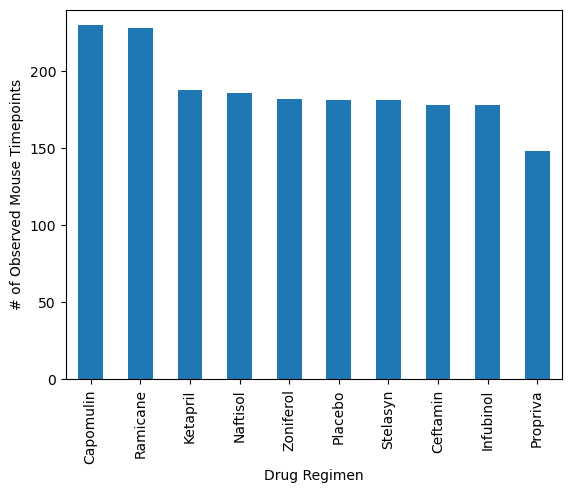

In [9]:
# Create dataframe grouping by drug regimen, showing total numebr of mouse timepoints
drug_regimen_grp_count = mouse_study_clean.groupby('Drug Regimen').size().sort_values(ascending=False).reset_index(name='count')

# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# 4. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
# 5. https://stackoverflow.com/questions/20865487/pandas-plot-without-a-legend
drugreg_barchart = drug_regimen_grp_count.plot.bar(x='Drug Regimen', y='count', rot=90, legend=False)

drugreg_barchart.set_ylabel('# of Observed Mouse Timepoints')
drugreg_barchart.set_ylim(0,240)

plt.show()

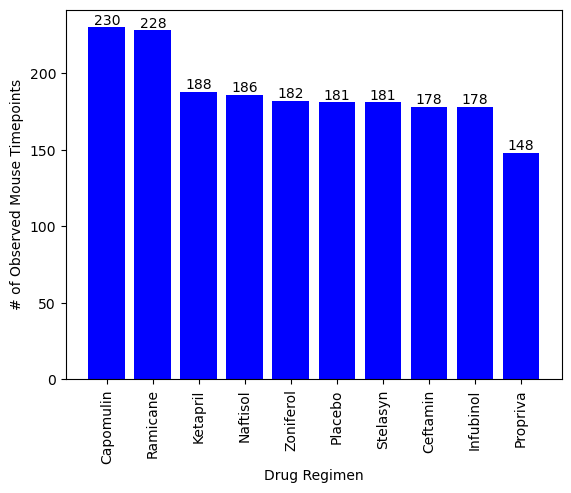

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Create x and y axis lists for bar plot
Drug_regimen = list(drug_regimen_grp_count['Drug Regimen'])
Drug_regimen_count = list(drug_regimen_grp_count['count'])
x_axis = np.arange(len(Drug_regimen))

drug_regimen_bar = plt.bar(x_axis, Drug_regimen_count, color="blue", align="center")
plt.bar_label(drug_regimen_bar)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Drug_regimen, rotation=90)

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.show()

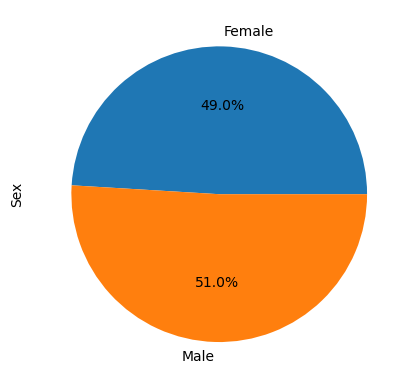

In [11]:
# Group mice count by sex
mice_sex = mouse_study_clean.groupby('Sex').size().reset_index(name='count')
mice_sex.set_index('Sex', drop=False, inplace=True)

# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex_pie = mice_sex.plot.pie(y='count', autopct='%1.1f%%', legend=False)

mice_sex_pie.set_ylabel('Sex')

plt.show()

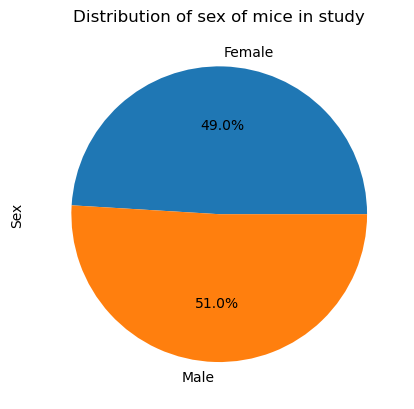

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sizes = list(mice_sex['count'])
labels = list(mice_sex['Sex'])

plt.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.ylabel('Sex')
plt.title('Distribution of sex of mice in study')

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = mouse_study_clean.groupby('Mouse ID')['Timepoint'].max().reset_index(name='Timepoint')

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_vol_last_timepoint = pd.merge(last_timepoint, mouse_study_clean, how='left', on=['Mouse ID', 'Timepoint'])

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
Treatment_regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
Final_tumor_vol = []

# Loop through each treatment, create list of final tumor vol for box plot and print any potential outliers
for treatment in Treatment_regimen:
         
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
    treatment_tumorvol = tumor_vol_last_timepoint['Tumor Volume (mm3)'].loc[(tumor_vol_last_timepoint['Drug Regimen'] == treatment)]
    Final_tumor_vol.append(treatment_tumorvol)
    treatment_tumorvol_df = pd.DataFrame(treatment_tumorvol)

    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    q1 = treatment_tumorvol_df['Tumor Volume (mm3)'].quantile(0.25)
    q3 = treatment_tumorvol_df['Tumor Volume (mm3)'].quantile(0.75)
    iqr = q3 - q1

    outliers = treatment_tumorvol_df['Tumor Volume (mm3)'][((treatment_tumorvol_df['Tumor Volume (mm3)'] < (q1 - 1.5*iqr)) 
                                                            | 
                                                            (treatment_tumorvol_df['Tumor Volume (mm3)'] > (q3 + 1.5*iqr)))]

    print(f"{treatment}'s potential outliers: {outliers}")
    # print(f"{treatment} - q1: {q1}, q3: {q3}, median: {treatment_tumorvol_df['Tumor Volume (mm3)'].quantile(0.5)}, lowerbound: {q1 - 1.5*iqr}, upperbound: {q3 + 1.5*iqr}")
    print(' ')

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
 
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
 
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
 
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
 


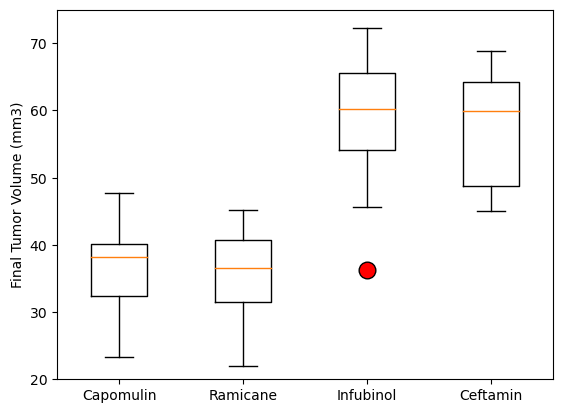

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# 6. https://python-charts.com/distribution/box-plot-matplotlib/
plt.boxplot(Final_tumor_vol, labels=Treatment_regimen, flierprops=dict(markerfacecolor="red", markersize=12))
plt.ylabel('Final Tumor Volume (mm3)')
plt.ylim(20,75)

plt.show()

## Line and Scatter Plots

---- User input required ----


Choose a number between 0 and 24 (inclusive):  18


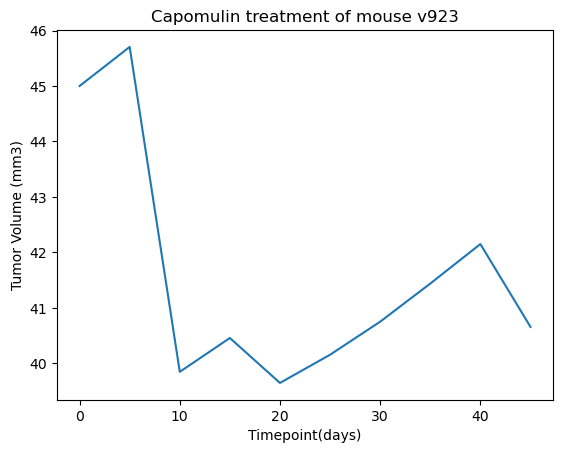

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_tumorvol = mouse_study_clean.loc[(mouse_study_clean['Drug Regimen'] == 'Capomulin')]

# Get max index of unique mouse IDs treated with Capomulin, create input as the unique mouse ID for filtering the line plot
max_mouse_ID = len(Capomulin_tumorvol['Mouse ID'].unique())-1
print('---- User input required ----')
chosen_mouse_ID = input('Choose a number between 0 and ' + str(max_mouse_ID) + ' (inclusive): ')

uniq_mouseID = Capomulin_tumorvol['Mouse ID'].unique()[int(chosen_mouse_ID)]

x_axis = Capomulin_tumorvol['Timepoint'].loc[(Capomulin_tumorvol['Mouse ID'] == uniq_mouseID)]
x_axis

y_axis = Capomulin_tumorvol['Tumor Volume (mm3)'].loc[(Capomulin_tumorvol['Mouse ID'] == uniq_mouseID)]
y_axis

plt.plot(x_axis, y_axis)
plt.title(f'Capomulin treatment of mouse {uniq_mouseID}')
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

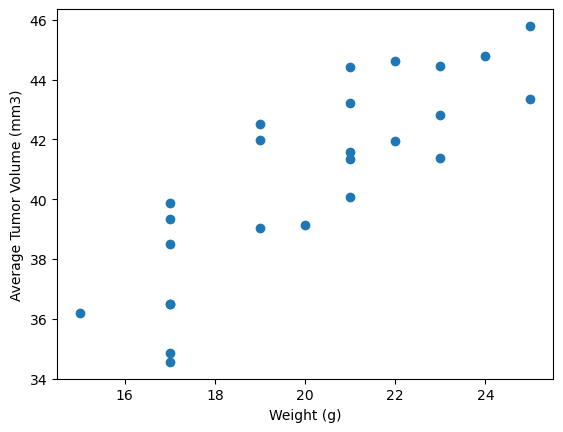

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Mouse weight - get by unique mouse IDs for Capomulin
uniq_mouse_Capomulin = Capomulin_tumorvol.drop_duplicates(subset=['Mouse ID'])

# Average tumor size
avg_tumor = Capomulin_tumorvol.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index(name='Average Tumor Volume (mm3)')

# Merge df together
avg_tumor_permouse = pd.merge(uniq_mouse_Capomulin,avg_tumor, on='Mouse ID')

# Create x and y axis
mouse_weight = avg_tumor_permouse['Weight (g)']

avg_tumor_size = avg_tumor_permouse['Average Tumor Volume (mm3)']

plt.scatter(mouse_weight, avg_tumor_size)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


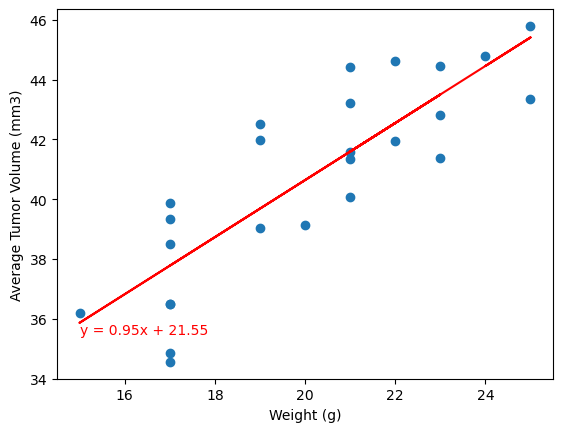

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(mouse_weight, avg_tumor_size)[0], 2)}")

mouse_weight = avg_tumor_permouse['Weight (g)']
avg_tumor_size = avg_tumor_permouse['Average Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, avg_tumor_size)
regression_value = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(mouse_weight, avg_tumor_size)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.plot(mouse_weight,regression_value,"r-")
plt.annotate(line_eq,(15,35.5),fontsize=10,color="red")

plt.show()